In [0]:
# Code to read csv file into colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials 

In [0]:
#STEP-2: Autheticate E-Mail ID

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [3]:
# Import required libraries
import numpy as np 
import matplotlib.pyplot as plt 
import matplotlib.colors as mcolors
import pandas as pd 
import random
import math
import time
from sklearn.linear_model import LinearRegression, BayesianRidge
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error
import datetime
import operator 
plt.style.use('fivethirtyeight')
%matplotlib inline 

import sklearn
from math import sqrt

# Import necessary modules
%tensorflow_version 1.x
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt

# Keras specific
import keras
from keras.models import Sequential
from keras.layers import Dense

TensorFlow 1.x selected.


Using TensorFlow backend.


In [0]:
confirmed_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
deaths_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
recoveries_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')
latest_data = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/04-02-2020.csv')

In [5]:
latest_data.head()

,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key
0,45001.0,Abbeville,South Carolina,US,4/2/20 23:25,34.223334,-82.461707,6,0,0,0,"Abbeville, South Carolina, US"
1,22001.0,Acadia,Louisiana,US,4/2/20 23:25,30.295065,-92.414197,61,1,0,0,"Acadia, Louisiana, US"
2,51001.0,Accomack,Virginia,US,4/2/20 23:25,37.767072,-75.632346,10,0,0,0,"Accomack, Virginia, US"
3,16001.0,Ada,Idaho,US,4/2/20 23:25,43.452658,-116.241552,312,3,0,0,"Ada, Idaho, US"
4,19001.0,Adair,Iowa,US,4/2/20 23:25,41.330756,-94.471059,1,0,0,0,"Adair, Iowa, US"


In [6]:
confirmed_df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,5/1/20,5/2/20,5/3/20,5/4/20,5/5/20,5/6/20,5/7/20,5/8/20,5/9/20,5/10/20,5/11/20,5/12/20,5/13/20,5/14/20,5/15/20,5/16/20,5/17/20,5/18/20,5/19/20,5/20/20,5/21/20,5/22/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,...,665,714,784,840,906,933,996,1026,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171,2335,2469,2704,2894,3224,3392,3563,3778,4033,4402,4687,4963,5226,5639,6053,6402,6664,7072,7653,8145,8676,9216
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,467,475,494,518,539,548,562,584,609,634,663,678,712,726,736,750,766,773,782,789,795,803,820,832,842,850,856,868,872,876,880,898,916,933,946,948,949,964,969,981
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,...,1983,2070,2160,2268,2418,2534,2629,2718,2811,2910,3007,3127,3256,3382,3517,3649,3848,4006,4154,4295,4474,4648,4838,4997,5182,5369,5558,5723,5891,6067,6253,6442,6629,6821,7019,7201,7377,7542,7728,7918
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,646,659,673,673,696,704,713,717,717,723,723,731,738,738,743,743,743,745,745,747,748,750,751,751,752,752,754,755,755,758,760,761,761,761,761,761,761,762,762,762
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,19,19,19,19,19,24,24,24,24,25,25,25,25,26,27,27,27,27,30,35,35,35,36,36,36,43,43,45,45,45,45,48,48,48,48,50,52,52,58,60


In [0]:
cols = confirmed_df.keys()

In [0]:
confirmed = confirmed_df.loc[:, cols[4]:cols[-1]]
deaths = deaths_df.loc[:, cols[4]:cols[-1]]
recoveries = recoveries_df.loc[:, cols[4]:cols[-1]]

In [0]:
dates = confirmed.keys()
world_cases = []
total_deaths = [] 
mortality_rate = []
recovery_rate = [] 
total_recovered = [] 
total_active = [] 
china_cases = [] 
italy_cases = []
us_cases = [] 
spain_cases = [] 
india_cases =[]

for i in dates:
    confirmed_sum = confirmed[i].sum()
    death_sum = deaths[i].sum()
    recovered_sum = recoveries[i].sum()
    
    # confirmed, deaths, recovered, and active
    world_cases.append(confirmed_sum)
    total_deaths.append(death_sum)
    total_recovered.append(recovered_sum)
    total_active.append(confirmed_sum-death_sum-recovered_sum)
    
    # calculate rates
    mortality_rate.append(death_sum/confirmed_sum)
    recovery_rate.append(recovered_sum/confirmed_sum)

    # case studies 
    china_cases.append(confirmed_df[confirmed_df['Country/Region']=='China'][i].sum())
    italy_cases.append(confirmed_df[confirmed_df['Country/Region']=='Italy'][i].sum())
    us_cases.append(confirmed_df[confirmed_df['Country/Region']=='US'][i].sum())
    spain_cases.append(confirmed_df[confirmed_df['Country/Region']=='Spain'][i].sum())
    india_cases.append(confirmed_df[confirmed_df['Country/Region']=='India'][i].sum())

**Getting daily increases**

In [0]:
def daily_increase(data):
    d = [] 
    for i in range(len(data)):
        if i == 0:
            d.append(data[0])
        else:
            d.append(data[i]-data[i-1])
    return d 

world_daily_increase = daily_increase(world_cases)
china_daily_increase = daily_increase(china_cases)
italy_daily_increase = daily_increase(italy_cases)
us_daily_increase = daily_increase(us_cases)
spain_daily_increase = daily_increase(spain_cases)
india_daily_increase = daily_increase(india_cases)

In [0]:
days_since_1_22 = np.array([i for i in range(len(dates))]).reshape(-1, 1)
world_cases = np.array(world_cases).reshape(-1, 1)
total_deaths = np.array(total_deaths).reshape(-1, 1)
total_recovered = np.array(total_recovered).reshape(-1, 1)

**Future forcasting**

In [0]:
days_in_future = 10
future_forcast = np.array([i for i in range(len(dates)+days_in_future)]).reshape(-1, 1)
adjusted_dates = future_forcast[:-10]

**Convert integer into datetime for better visualization**

In [0]:
start = '1/22/2020'
start_date = datetime.datetime.strptime(start, '%m/%d/%Y')
future_forcast_dates = []
for i in range(len(future_forcast)):
    future_forcast_dates.append((start_date + datetime.timedelta(days=i)).strftime('%m/%d/%Y'))

In [0]:
X_train_confirmed, X_test_confirmed, y_train_confirmed, y_test_confirmed = train_test_split(days_since_1_22, world_cases, test_size=0.10, shuffle=False) 

**EDA**

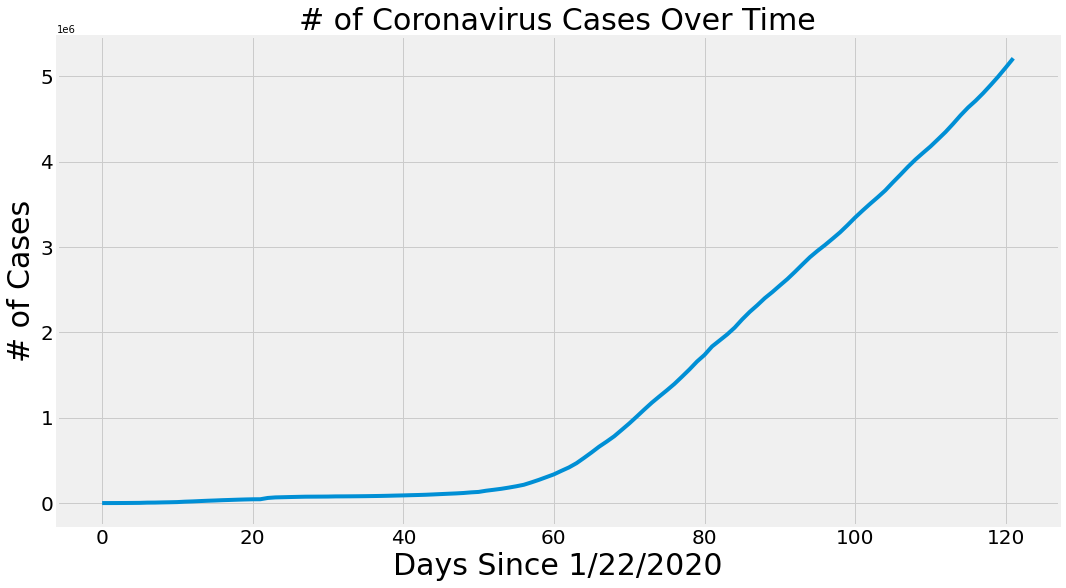

In [15]:
adjusted_dates = adjusted_dates.reshape(1, -1)[0]
plt.figure(figsize=(16, 9))
plt.plot(adjusted_dates, world_cases)
plt.title('# of Coronavirus Cases Over Time', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('# of Cases', size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

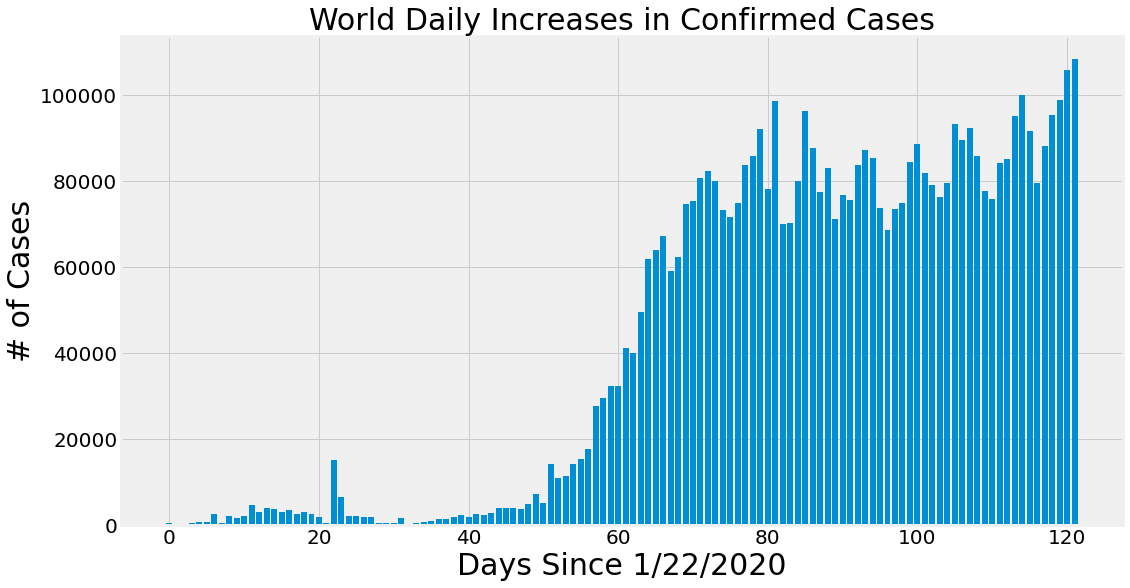

In [16]:
plt.figure(figsize=(16, 9))
plt.bar(adjusted_dates, world_daily_increase)
plt.title('World Daily Increases in Confirmed Cases', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('# of Cases', size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

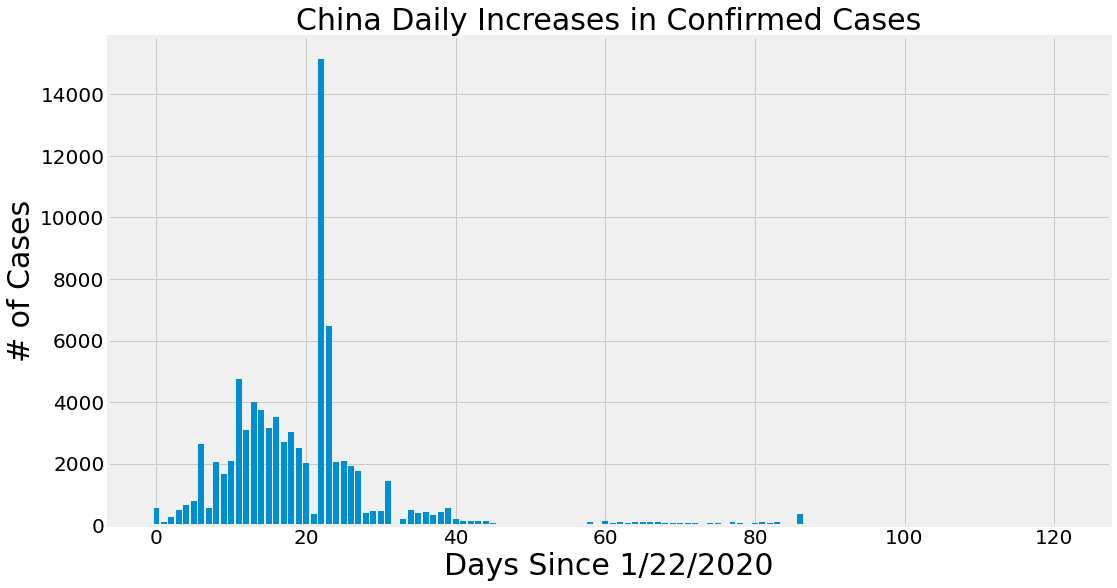

In [17]:
plt.figure(figsize=(16, 9))
plt.bar(adjusted_dates, china_daily_increase)
plt.title('China Daily Increases in Confirmed Cases', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('# of Cases', size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

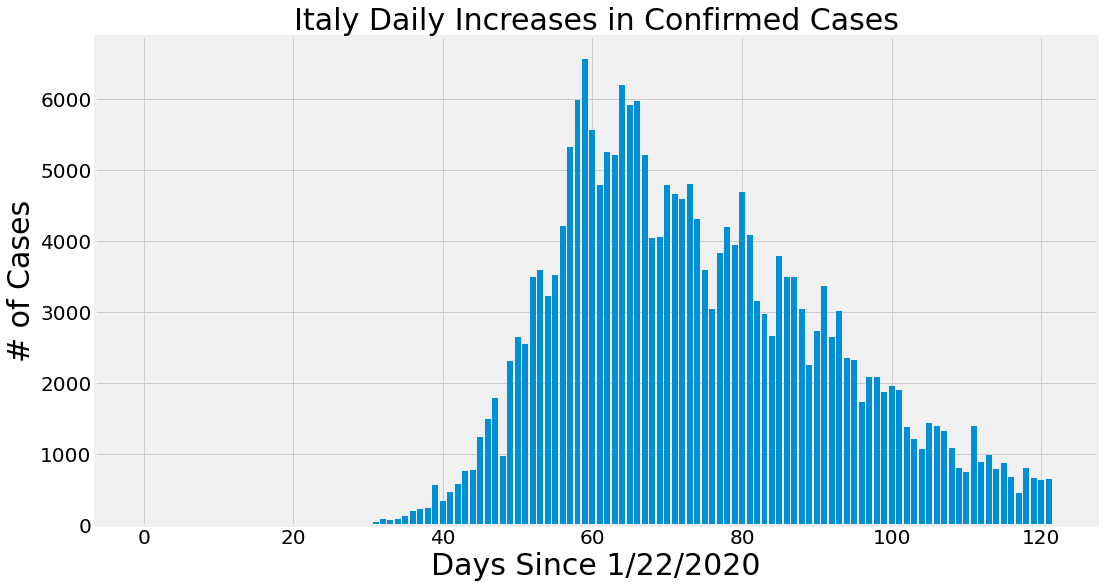

In [18]:
plt.figure(figsize=(16, 9))
plt.bar(adjusted_dates, italy_daily_increase)
plt.title('Italy Daily Increases in Confirmed Cases', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('# of Cases', size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

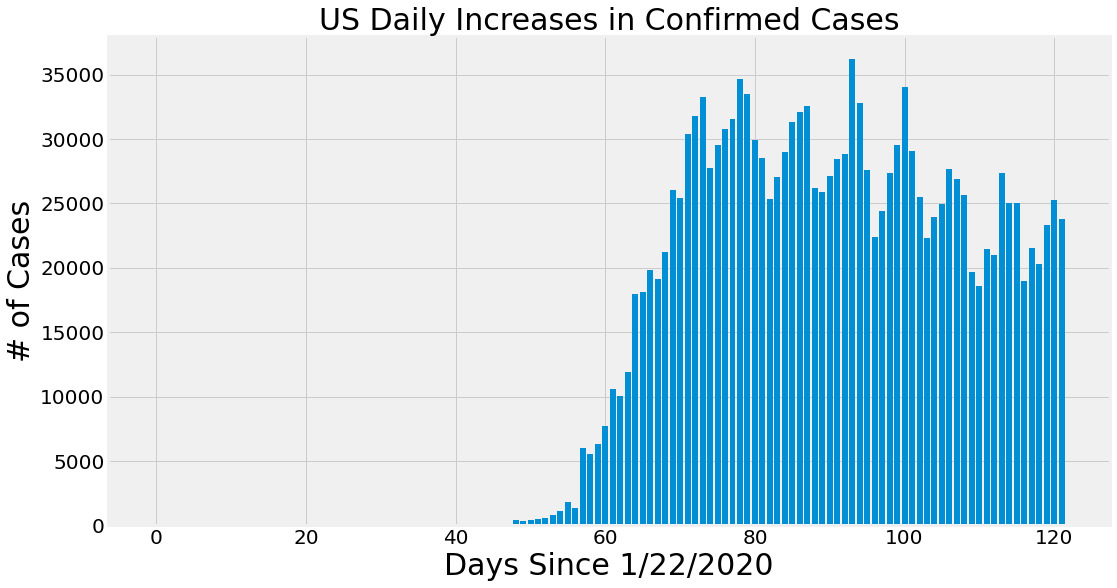

In [19]:
plt.figure(figsize=(16, 9))
plt.bar(adjusted_dates, us_daily_increase)
plt.title('US Daily Increases in Confirmed Cases', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('# of Cases', size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

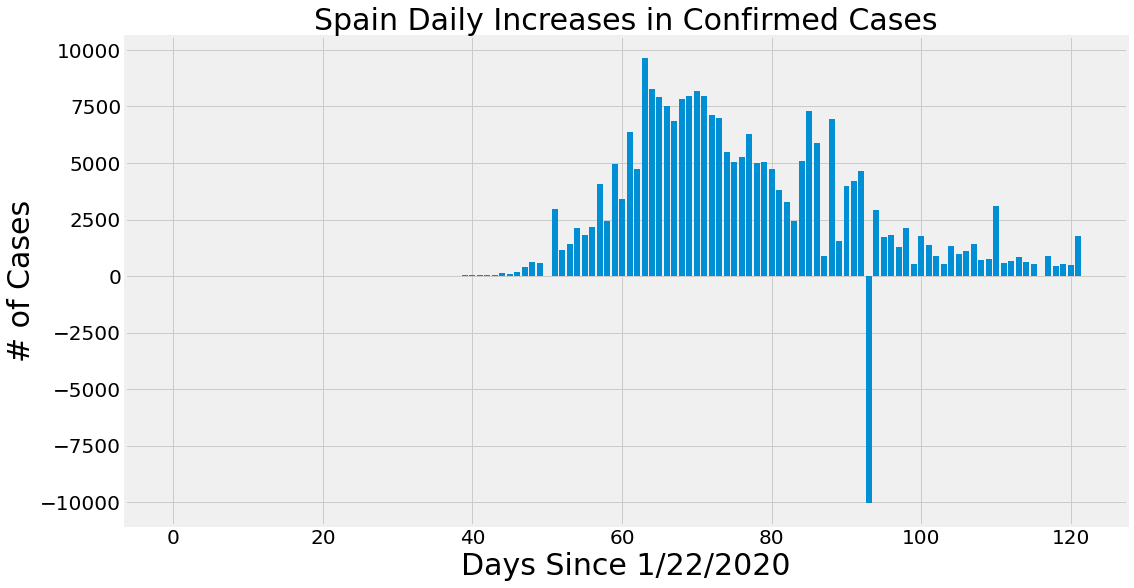

In [20]:
plt.figure(figsize=(16, 9))
plt.bar(adjusted_dates, spain_daily_increase)
plt.title('Spain Daily Increases in Confirmed Cases', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('# of Cases', size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

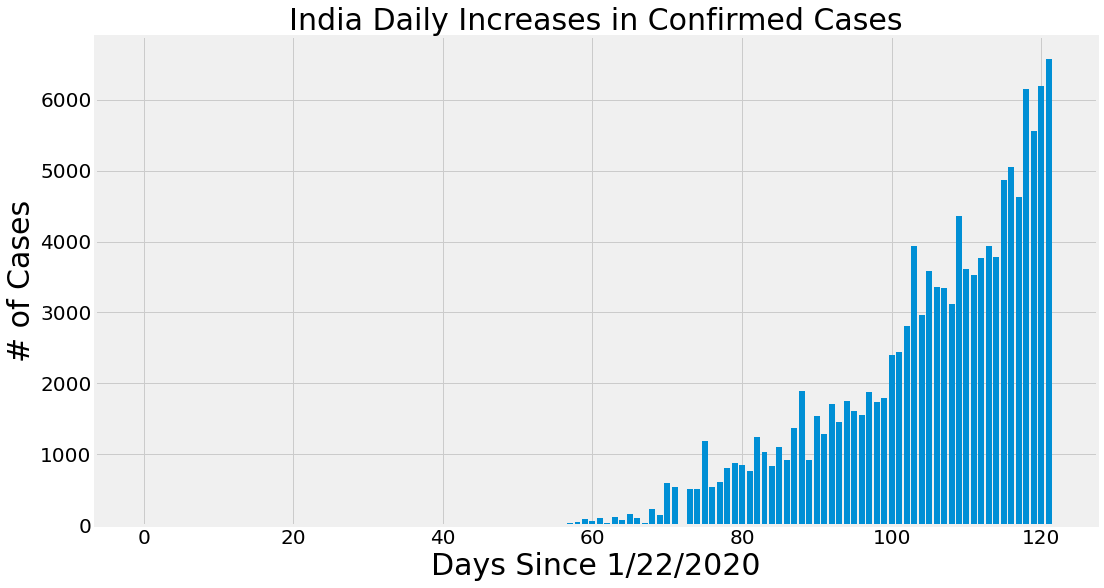

In [21]:
plt.figure(figsize=(16, 9))
plt.bar(adjusted_dates, india_daily_increase)
plt.title('India Daily Increases in Confirmed Cases', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('# of Cases', size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

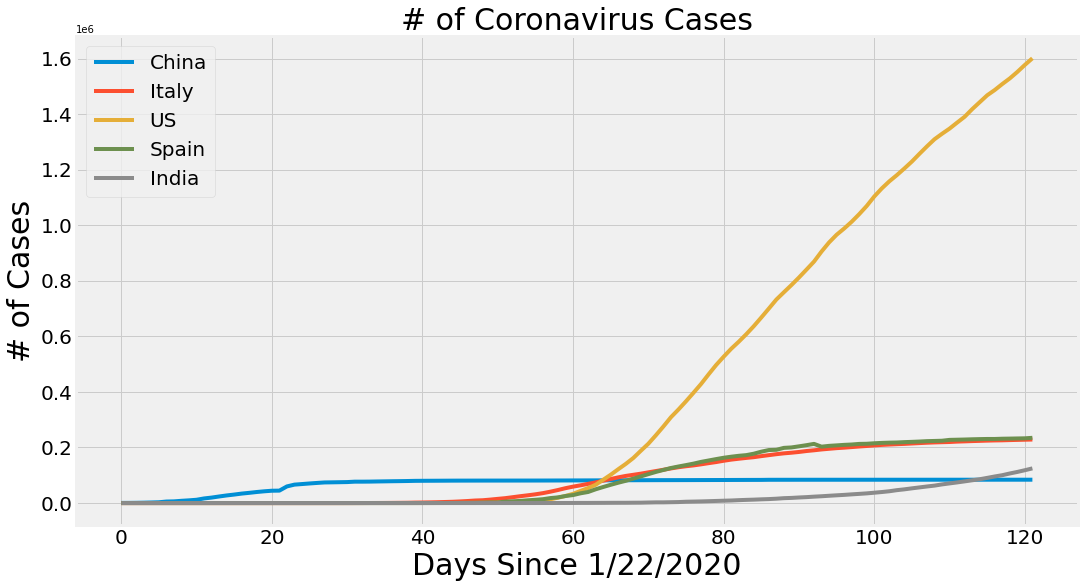

In [22]:
plt.figure(figsize=(16, 9))
plt.plot(adjusted_dates, china_cases)
plt.plot(adjusted_dates, italy_cases)
plt.plot(adjusted_dates, us_cases)
plt.plot(adjusted_dates, spain_cases)
plt.plot(adjusted_dates, india_cases)
plt.title('# of Coronavirus Cases', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('# of Cases', size=30)
plt.legend(['China', 'Italy', 'US', 'Spain','India'], prop={'size': 20})
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

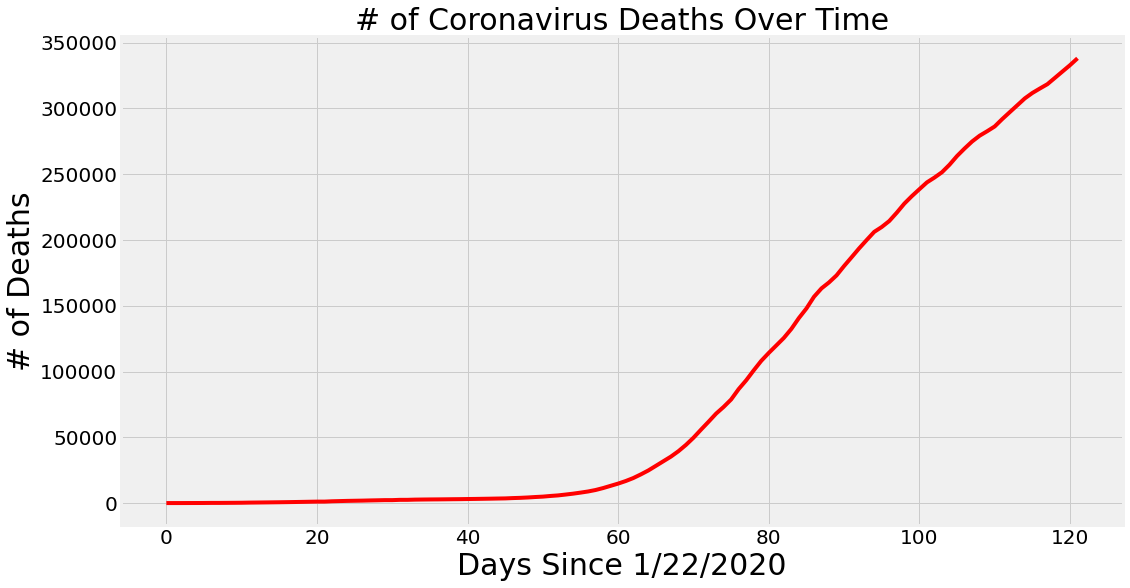

In [23]:
plt.figure(figsize=(16, 9))
plt.plot(adjusted_dates, total_deaths, color='red')
plt.title('# of Coronavirus Deaths Over Time', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('# of Deaths', size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

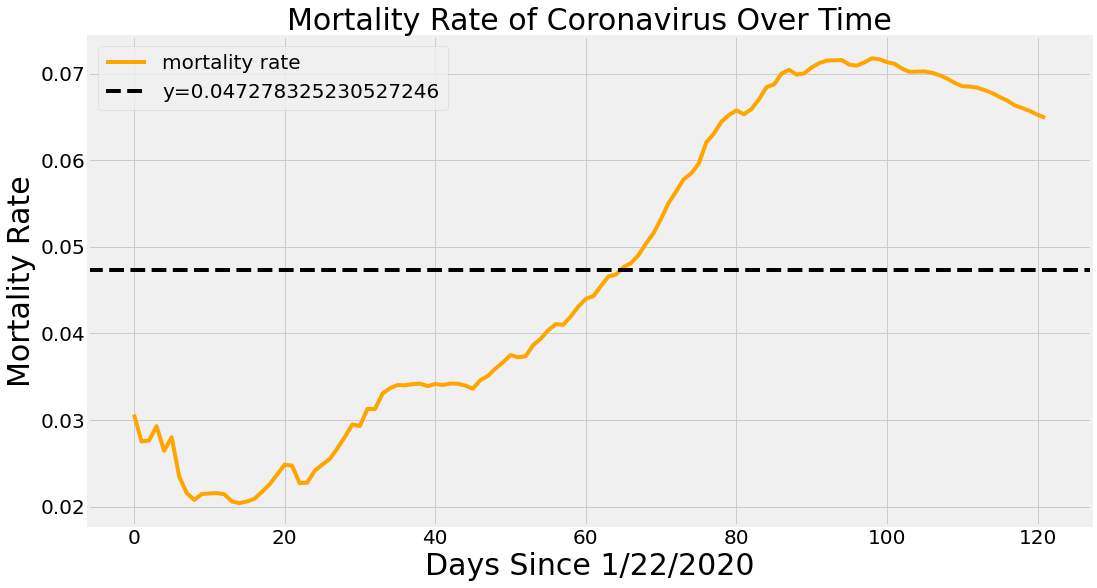

In [24]:
mean_mortality_rate = np.mean(mortality_rate)
plt.figure(figsize=(16, 9))
plt.plot(adjusted_dates, mortality_rate, color='orange')
plt.axhline(y = mean_mortality_rate,linestyle='--', color='black')
plt.title('Mortality Rate of Coronavirus Over Time', size=30)
plt.legend(['mortality rate', 'y='+str(mean_mortality_rate)], prop={'size': 20})
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('Mortality Rate', size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

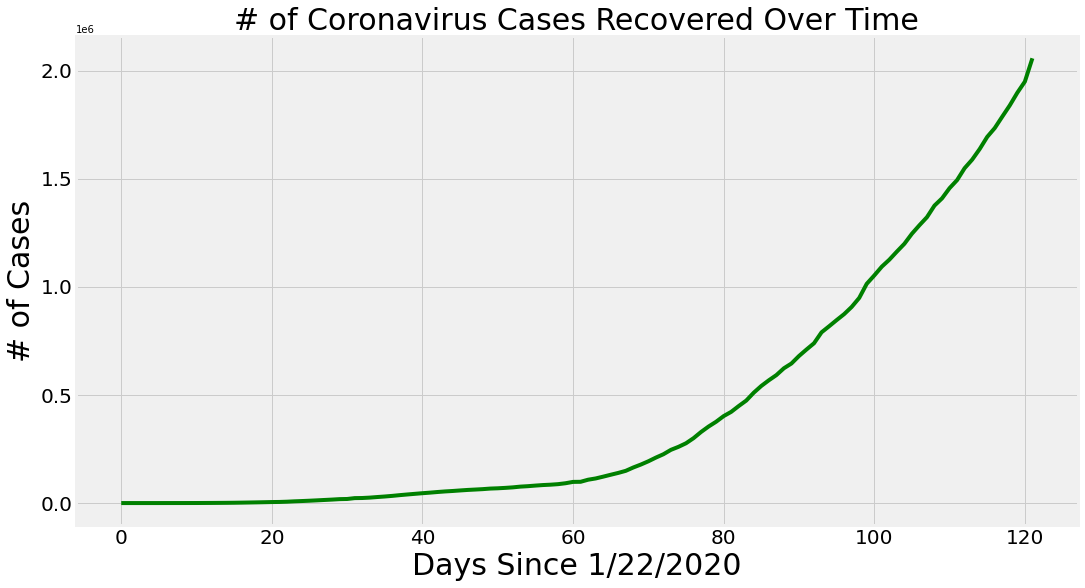

In [25]:
plt.figure(figsize=(16, 9))
plt.plot(adjusted_dates, total_recovered, color='green')
plt.title('# of Coronavirus Cases Recovered Over Time', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('# of Cases', size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

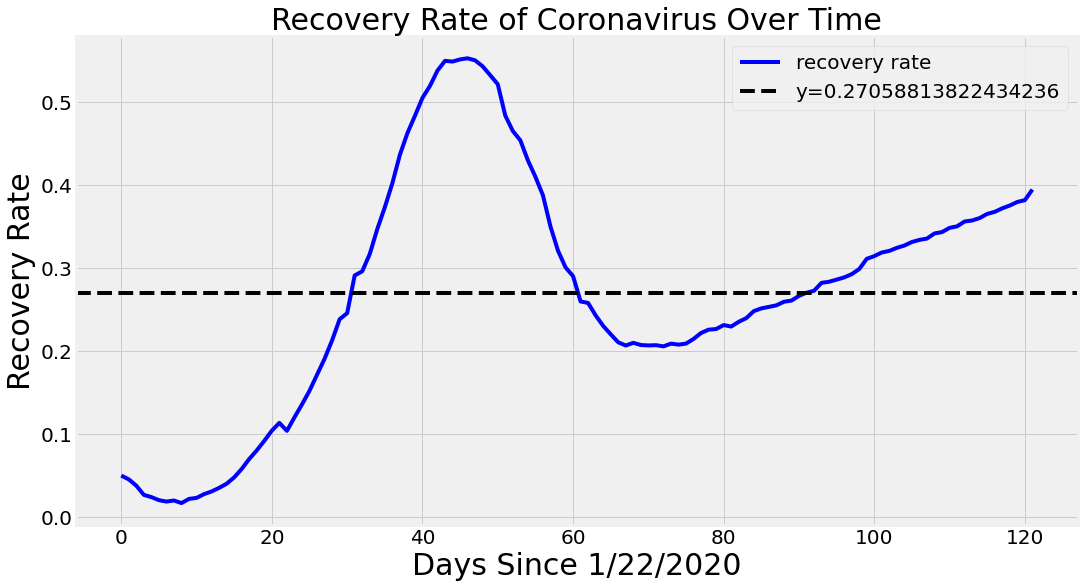

In [26]:
mean_recovery_rate = np.mean(recovery_rate)
plt.figure(figsize=(16, 9))
plt.plot(adjusted_dates, recovery_rate, color='blue')
plt.axhline(y = mean_recovery_rate,linestyle='--', color='black')
plt.title('Recovery Rate of Coronavirus Over Time', size=30)
plt.legend(['recovery rate', 'y='+str(mean_recovery_rate)], prop={'size': 20})
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('Recovery Rate', size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

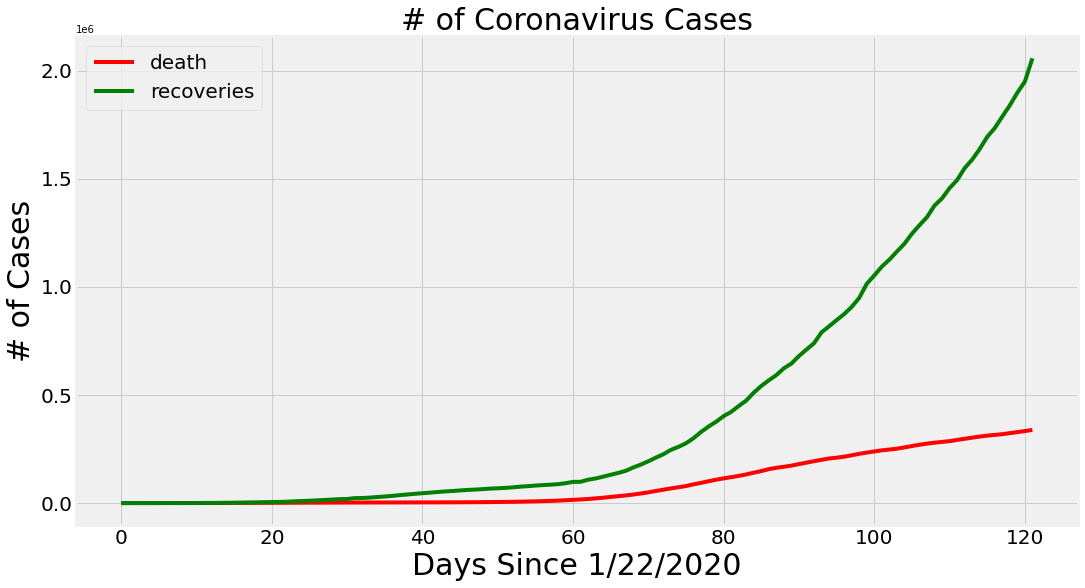

In [27]:
plt.figure(figsize=(16, 9))
plt.plot(adjusted_dates, total_deaths, color='r')
plt.plot(adjusted_dates, total_recovered, color='green')
plt.legend(['death', 'recoveries'], loc='best', fontsize=20)
plt.title('# of Coronavirus Cases', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('# of Cases', size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

In [0]:
unique_countries =  list(latest_data['Country_Region'].unique())

In [0]:
country_confirmed_cases = []
country_death_cases = [] 
country_recovery_cases = []
country_mortality_rate = [] 

no_cases = []
for i in unique_countries:
    cases = latest_data[latest_data['Country_Region']==i]['Confirmed'].sum()
    if cases > 0:
        country_confirmed_cases.append(cases)
    else:
        no_cases.append(i)
        
for i in no_cases:
    unique_countries.remove(i)
    
# sort countries by the number of confirmed cases
unique_countries = [k for k, v in sorted(zip(unique_countries, country_confirmed_cases), key=operator.itemgetter(1), reverse=True)]
for i in range(len(unique_countries)):
    country_confirmed_cases[i] = latest_data[latest_data['Country_Region']==unique_countries[i]]['Confirmed'].sum()
    country_death_cases.append(latest_data[latest_data['Country_Region']==unique_countries[i]]['Deaths'].sum())
    country_recovery_cases.append(latest_data[latest_data['Country_Region']==unique_countries[i]]['Recovered'].sum())
    country_mortality_rate.append(country_death_cases[i]/country_confirmed_cases[i])

In [30]:
country_df = pd.DataFrame({'Country Name': unique_countries, 'Number of Confirmed Cases': country_confirmed_cases,
                          'Number of Deaths': country_death_cases, 'Number of Recoveries' : country_recovery_cases,
                          'Mortality Rate': country_mortality_rate})
# number of cases per country/region

country_df.style.background_gradient(cmap='Greens')

,Country Name,Number of Confirmed Cases,Number of Deaths,Number of Recoveries,Mortality Rate
0,US,243599,5926,9001,0.024327
1,Italy,115242,13915,18278,0.120746
2,Spain,112065,10348,26743,0.092339
3,Germany,84794,1107,22440,0.013055
4,China,82432,3322,76565,0.040300
5,France,59929,5398,12548,0.090073
6,Iran,50468,3160,16711,0.062614
7,United Kingdom,34173,2926,192,0.085623
8,Switzerland,18827,536,4013,0.028470
9,Turkey,18135,356,415,0.019631


In [0]:
unique_provinces =  list(latest_data['Province_State'].unique())

In [0]:
province_confirmed_cases = []
province_country = [] 
province_death_cases = [] 
province_recovery_cases = []
province_mortality_rate = [] 

no_cases = [] 
for i in unique_provinces:
    cases = latest_data[latest_data['Province_State']==i]['Confirmed'].sum()
    if cases > 0:
        province_confirmed_cases.append(cases)
    else:
        no_cases.append(i)
 
# remove areas with no confirmed cases
for i in no_cases:
    unique_provinces.remove(i)
    
unique_provinces = [k for k, v in sorted(zip(unique_provinces, province_confirmed_cases), key=operator.itemgetter(1), reverse=True)]
for i in range(len(unique_provinces)):
    province_confirmed_cases[i] = latest_data[latest_data['Province_State']==unique_provinces[i]]['Confirmed'].sum()
    province_country.append(latest_data[latest_data['Province_State']==unique_provinces[i]]['Country_Region'].unique()[0])
    province_death_cases.append(latest_data[latest_data['Province_State']==unique_provinces[i]]['Deaths'].sum())
    province_recovery_cases.append(latest_data[latest_data['Province_State']==unique_provinces[i]]['Recovered'].sum())
    province_mortality_rate.append(province_death_cases[i]/province_confirmed_cases[i])

In [33]:
# number of cases per province/state/city
province_df = pd.DataFrame({'Province/State Name': unique_provinces, 'Country': province_country, 'Number of Confirmed Cases': province_confirmed_cases,
                          'Number of Deaths': province_death_cases, 'Number of Recoveries' : province_recovery_cases,
                          'Mortality Rate': province_mortality_rate})
# number of cases per country/region

province_df.style.background_gradient(cmap='Greens')

,Province/State Name,Country,Number of Confirmed Cases,Number of Deaths,Number of Recoveries,Mortality Rate
0,New York,US,92506,2373,0,0.025652
1,Hubei,China,67802,3199,63471,0.047181
2,New Jersey,US,25590,537,0,0.020985
3,Michigan,US,10791,417,0,0.038643
4,California,US,10773,238,0,0.022092
5,Louisiana,US,9149,310,0,0.033883
6,Florida,US,9008,164,0,0.018206
7,Massachusetts,US,8966,154,0,0.017176
8,Illinois,US,7695,163,0,0.021183
9,Pennsylvania,US,7268,90,0,0.012383


In [0]:
nan_indices = [] 

# handle nan if there is any, it is usually a float: float('nan')

for i in range(len(unique_provinces)):
    if type(unique_provinces[i]) == float:
        nan_indices.append(i)

unique_provinces = list(unique_provinces)
province_confirmed_cases = list(province_confirmed_cases)

for i in nan_indices:
    unique_provinces.pop(i)
    province_confirmed_cases.pop(i)

### **COUNTRY BASED PREDICITONS USING KALMAN FILTER**

**Kalman Filter Model**

In [0]:
# fix region names
confirmed_df['Country/Region']= confirmed_df['Country/Region'].str.replace("Mainland China", "China")
confirmed_df['Country/Region']= confirmed_df['Country/Region'].str.replace("US", "Unites States")
deaths_df['Country/Region']= deaths_df['Country/Region'].str.replace("Mainland China", "China")
deaths_df['Country/Region']= deaths_df['Country/Region'].str.replace("US", "Unites States")
recoveries_df['Country/Region']= recoveries_df['Country/Region'].str.replace("Mainland China", "China")
recoveries_df['Country/Region']= recoveries_df['Country/Region'].str.replace("US", "Unites States")

**Get Population**

In [36]:
population=pd.read_csv('https://raw.githubusercontent.com/Rank23/COVID19/master/population.csv', sep=',', encoding='latin1') 
population.head()

,Province/State,Country/Region,Population
0,Anhui,China,"62,000,000"
1,Beijing,China,"21,710,000"
2,Chongqing,China,"7,990,000"
3,Fujian,China,"36,894,216"
4,Gansu,China,"25,575,254"


In [0]:
confirmed_df=pd.merge(confirmed_df, population,how='left' ,on=['Province/State','Country/Region'])
deaths_df=pd.merge(deaths_df, population,how='left' ,on=['Province/State','Country/Region'])
recoveries_df=pd.merge(recoveries_df, population,how='left' ,on=['Province/State','Country/Region'])

In [38]:
# merge region
confirmed_df['region']=confirmed_df['Country/Region'].map(str)+'_'+confirmed_df['Province/State'].map(str)
deaths_df['region']=deaths_df['Country/Region'].map(str)+'_'+deaths_df['Province/State'].map(str)
recoveries_df['region']=recoveries_df['Country/Region'].map(str)+'_'+recoveries_df['Province/State'].map(str)
confirmed_df.iloc[:5,:]

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,5/1/20,5/2/20,5/3/20,5/4/20,5/5/20,5/6/20,5/7/20,5/8/20,5/9/20,5/10/20,5/11/20,5/12/20,5/13/20,5/14/20,5/15/20,5/16/20,5/17/20,5/18/20,5/19/20,5/20/20,5/21/20,5/22/20,Population,region
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,...,784,840,906,933,996,1026,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171,2335,2469,2704,2894,3224,3392,3563,3778,4033,4402,4687,4963,5226,5639,6053,6402,6664,7072,7653,8145,8676,9216,"35,530,000",Afghanistan_nan
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,494,518,539,548,562,584,609,634,663,678,712,726,736,750,766,773,782,789,795,803,820,832,842,850,856,868,872,876,880,898,916,933,946,948,949,964,969,981,NaN,Albania_nan
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,...,2160,2268,2418,2534,2629,2718,2811,2910,3007,3127,3256,3382,3517,3649,3848,4006,4154,4295,4474,4648,4838,4997,5182,5369,5558,5723,5891,6067,6253,6442,6629,6821,7019,7201,7377,7542,7728,7918,"41,320,000",Algeria_nan
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,673,673,696,704,713,717,717,723,723,731,738,738,743,743,743,745,745,747,748,750,751,751,752,752,754,755,755,758,760,761,761,761,761,761,761,762,762,762,NaN,Andorra_nan
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,19,19,19,24,24,24,24,25,25,25,25,26,27,27,27,27,30,35,35,35,36,36,36,43,43,45,45,45,45,48,48,48,48,50,52,52,58,60,NaN,Angola_nan


**Create Time Series + Plots**

In [0]:
def create_ts(df):
  ts=df
  ts=ts.drop(['Province/State', 'Country/Region','Lat', 'Long',' Population '], axis=1)
  ts.set_index('region')
  ts=ts.T
  ts.columns=ts.loc['region']
  ts=ts.drop('region')
  ts=ts.fillna(0)
  ts=ts.reindex(sorted(ts.columns), axis=1)
  return (ts)

In [0]:
ts=create_ts(confirmed_df)
ts_d=create_ts(deaths_df)
ts_rec=create_ts(recoveries_df)

Text(0.5, 1.0, 'Daily Total Recoverd - Major areas')

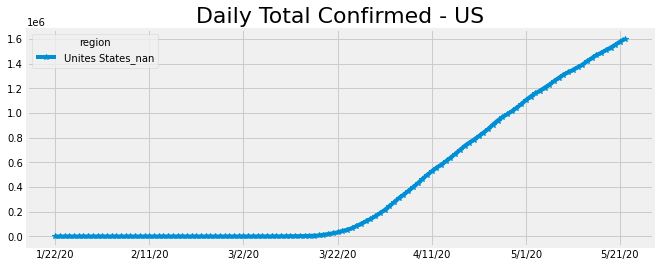

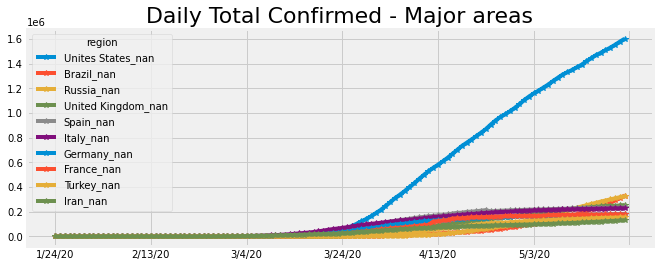

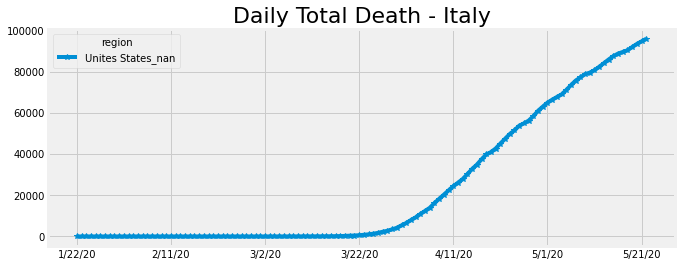

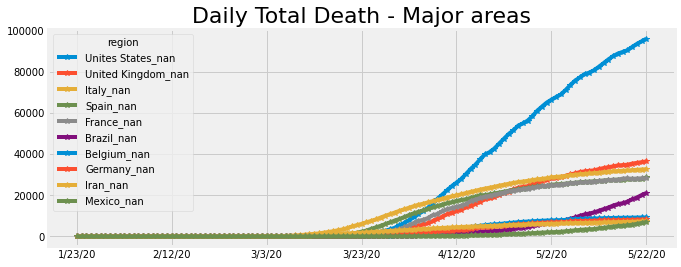

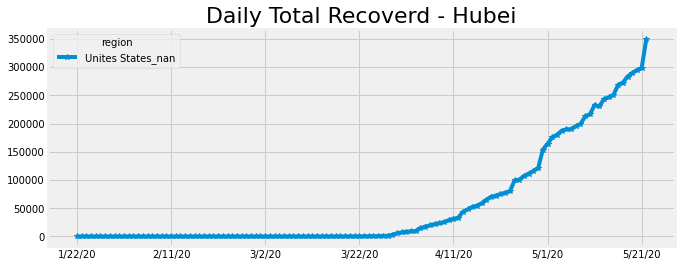

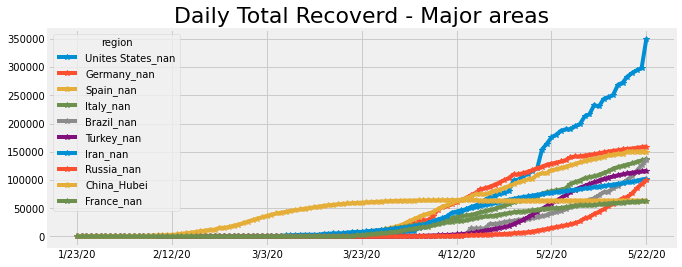

In [41]:
import matplotlib.pyplot as plt
p=ts.reindex(ts.max().sort_values(ascending=False).index, axis=1)
p.iloc[:,:1].plot(marker='*',figsize=(10,4)).set_title('Daily Total Confirmed - US',fontdict={'fontsize': 22})
p.iloc[2:,:10].plot(marker='*',figsize=(10,4)).set_title('Daily Total Confirmed - Major areas',fontdict={'fontsize': 22})

p_d=ts_d.reindex(ts_d.max().sort_values(ascending=False).index, axis=1)
p_d.iloc[:,:1].plot(marker='*',figsize=(10,4)).set_title('Daily Total Death - Italy',fontdict={'fontsize': 22})
p_d.iloc[1:,:10].plot(marker='*',figsize=(10,4)).set_title('Daily Total Death - Major areas',fontdict={'fontsize': 22})

p_r=ts_rec.reindex(ts_rec.max().sort_values(ascending=False).index, axis=1)
p_r.iloc[:,:1].plot(marker='*',figsize=(10,4)).set_title('Daily Total Recoverd - Hubei',fontdict={'fontsize': 22})
p_r.iloc[1:,:10].plot(marker='*',figsize=(10,4)).set_title('Daily Total Recoverd - Major areas',fontdict={'fontsize': 22})

**Kalman Filter With R**

In [0]:
# Create data for R script
from google.colab import files
ts_r=ts.reset_index()
ts_r=ts_r.rename(columns = {'index':'date'})
ts_r['date']=pd.to_datetime(ts_r['date'] ,errors ='coerce')
ts_r.to_csv('ts_r.csv')
files.download("ts_r.csv")

In [43]:
import rpy2
%load_ext rpy2.ipython

/usr/local/lib/python3.6/dist-packages/rpy2/robjects/pandas2ri.py:14: FutureWarning: pandas.core.index is deprecated and will be removed in a future version.  The public classes are available in the top-level namespace.
  from pandas.core.index import Index as PandasIndex
/usr/local/lib/python3.6/dist-packages/rpy2/robjects/pandas2ri.py:34: UserWarning: pandas >= 1.0 is not supported.
  warnings.warn('pandas >= 1.0 is not supported.')


In [44]:
%%R
install.packages('pracma')
install.packages('reshape')

R[write to console]: Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

R[write to console]: trying URL 'https://cran.rstudio.com/src/contrib/pracma_2.2.9.tar.gz'

R[write to console]: Content type 'application/x-gzip'
R[write to console]:  length 400551 bytes (391 KB)

R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write

In [45]:
%%R
require(pracma)
require(Metrics)
require(readr)
all<- read_csv("ts_r.csv")
all$X1<-NULL
date<-all[,1]
date[nrow(date) + 1,1] <-all[nrow(all),1]+1
pred_all<-NULL
for (n in 2:ncol(all)-1) {
  Y<-ts(data = all[n+1], start = 1, end =nrow(all)+1)  
  sig_w<-0.01
  w<-sig_w*randn(1,100) # acceleration which denotes the fluctuation (Q/R) rnorm(100, mean = 0, sd = 1)
  sig_v<-0.01
  v<-sig_v*randn(1,100)   
  t<-0.45
  phi<-matrix(c(1,0,t,1),2,2)
  gama<-matrix(c(0.5*t^2,t),2,1)
  H<-matrix(c(1,0),1,2)
  #Kalman
  x0_0<-p0_0<-matrix(c(0,0),2,1)
  p0_0<-matrix(c(1,0,0,1),2,2)
  Q<-0.01
  R<-0.01
  X<-NULL
  X2<-NULL
  pred<-NULL
  for (i in 0:nrow(all)) {
    namp <-paste("p", i+1,"_",i, sep = "")
    assign(namp, phi%*%(get(paste("p", i,"_",i, sep = "")))%*%t(phi)+gama%*%Q%*%t(gama))
    namk <- paste("k", i+1, sep = "")
    assign(namk,get(paste("p", i+1,"_",i, sep = ""))%*%t(H)%*%(1/(H%*%get(paste("p", i+1,"_",i, sep = ""))%*%t(H)+R)))
    namx <- paste("x", i+1,"_",i, sep = "")
    assign(namx,phi%*%get(paste("x", i,"_",i, sep = "")))
    namE <- paste("E", i+1, sep = "")
    assign(namE,Y[i+1]-H%*%get(paste("x", i+1,"_",i, sep = "")))
    namx2 <- paste("x", i+1,"_",i+1, sep = "")
    assign(namx2,get(paste("x", i+1,"_",i, sep = ""))+get(paste("k", i+1, sep = ""))%*%get(paste("E", i+1, sep = "")))
    namp2 <- paste("p", i+1,"_",i+1, sep = "")
    assign(namp2,(p0_0-get(paste("k", i+1, sep = ""))%*%H)%*%get(paste("p", i+1,"_",i, sep = "")))
    X<-rbind(X,get(paste("x", i+1,"_",i,sep = ""))[1])
    X2<-rbind(X2,get(paste("x", i+1,"_",i,sep = ""))[2])
    if(i>2){
      remove(list=(paste("p", i-1,"_",i-2, sep = "")))
      remove(list=(paste("k", i-1, sep = "")))
      remove(list=(paste("E", i-1, sep = "")))
      remove(list=(paste("p", i-2,"_",i-2, sep = "")))
      remove(list=(paste("x", i-1,"_",i-2, sep = "")))
      remove(list=(paste("x", i-2,"_",i-2, sep = "")))}
  }
  pred<-NULL
  pred<-cbind(Y,X,round(X2,4))
  pred<-as.data.frame(pred)
  pred$region<-colnames(all[,n+1])
  pred$date<-date$date
  pred$actual<-rbind(0,(cbind(pred[2:nrow(pred),1])/pred[1:nrow(pred)-1,1]-1)*100)
  pred$predict<-rbind(0,(cbind(pred[2:nrow(pred),2])/pred[1:nrow(pred)-1,2]-1)*100)
  pred$pred_rate<-(pred$X/pred$Y-1)*100
  pred$X2_change<-rbind(0,(cbind(pred[2:nrow(pred),3]-pred[1:nrow(pred)-1,3])))
  pred_all<-rbind(pred_all,pred)
}
pred_all<-cbind(pred_all[,4:5],pred_all[,1:3])
names(pred_all)[5]<-"X2"
pred_all=pred_all[with( pred_all, order(region, date)), ]
pred_all<-pred_all[,3:5]

R[write to console]: Loading required package: pracma

R[write to console]: Loading required package: Metrics

R[write to console]: Loading required package: readr

R[write to console]: Parsed with column specification:
cols(
  .default = col_double(),
  date = col_date(format = "")
)

R[write to console]: See spec(...) for full column specifications.



In [0]:
p=%R pred_all

In [0]:
############ Merge R output due to package problem
t=ts_d
t=t.stack().reset_index(name='confirmed')
t.columns=['date', 'region','confirmed']
t['date']=pd.to_datetime(t['date'] ,errors ='coerce')
t=t.sort_values(['region', 'date'])

temp=t.iloc[:,:3]
temp=temp.reset_index(drop=True)
for i in range(1,len(t)+1):
  if(temp.iloc[i,1] is not temp.iloc[i-1,1]):
    temp.loc[len(temp)+1] = [temp.iloc[i-1,0]+ pd.DateOffset(1),temp.iloc[i-1,1], 0] 
temp=temp.sort_values(['region', 'date'])
temp=temp.reset_index(drop=True)
temp['Y']=p['Y']
temp['X']=p['X']
temp['X2']=p['X2']

**Build Train Set Data Structure**

In [0]:
t=ts
t=t.stack().reset_index(name='confirmed')
t.columns=['date', 'region','confirmed']
t['date']=pd.to_datetime(t['date'] ,errors ='coerce')
t=t.sort_values(['region', 'date'])

# Add 1 Future day for prediction
t=t.reset_index(drop=True)
for i in range(1,len(t)+1):
  if(t.iloc[i,1] is not t.iloc[i-1,1]):
    t.loc[len(t)+1] = [t.iloc[i-1,0]+ pd.DateOffset(1),t.iloc[i-1,1], 0] 
t=t.sort_values(['region', 'date'])
t=t.reset_index(drop=True)

**Kalman X Days Ahead Prediction**

In [49]:
%%R
install.packages('reshape')

R[write to console]: Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

R[write to console]: trying URL 'https://cran.rstudio.com/src/contrib/reshape_0.8.8.tar.gz'

R[write to console]: Content type 'application/x-gzip'
R[write to console]:  length 42558 bytes (41 KB)

R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write 

In [50]:
%%R
require(pracma)
require(Metrics)
require(readr)
library(reshape)
all<- read_csv("ts_r.csv")
all$X1<-NULL
for (i in 1:30) { # Set i days prediction
  if( i>1) {all<-all_new}
  date<-all[,1]
  date[nrow(date) + 1,1] <-all[nrow(all),1]+1
  pred_all<-NULL
  for (n in 2:ncol(all)-1) {
    Y<-ts(data = all[n+1], start = 1, end =nrow(all)+1)  
    sig_w<-0.01
    w<-sig_w*randn(1,100) # acceleration which denotes the fluctuation (Q/R) rnorm(100, mean = 0, sd = 1)
    sig_v<-0.01
    v<-sig_v*randn(1,100)  
    t<-0.45
    phi<-matrix(c(1,0,t,1),2,2)
    gama<-matrix(c(0.5*t^2,t),2,1)
    H<-matrix(c(1,0),1,2)
    #Kalman
    x0_0<-p0_0<-matrix(c(0,0),2,1)
    p0_0<-matrix(c(1,0,0,1),2,2)
    Q<-0.01
    R<-0.01
    X<-NULL
    X2<-NULL
    pred<-NULL
    for (i in 0:nrow(all)) {
      namp <-paste("p", i+1,"_",i, sep = "")
      assign(namp, phi%*%(get(paste("p", i,"_",i, sep = "")))%*%t(phi)+gama%*%Q%*%t(gama))
      namk <- paste("k", i+1, sep = "")
      assign(namk,get(paste("p", i+1,"_",i, sep = ""))%*%t(H)%*%(1/(H%*%get(paste("p", i+1,"_",i, sep = ""))%*%t(H)+R)))
      namx <- paste("x", i+1,"_",i, sep = "")
      assign(namx,phi%*%get(paste("x", i,"_",i, sep = "")))
      namE <- paste("E", i+1, sep = "")
      assign(namE,Y[i+1]-H%*%get(paste("x", i+1,"_",i, sep = "")))
      namx2 <- paste("x", i+1,"_",i+1, sep = "")
      assign(namx2,get(paste("x", i+1,"_",i, sep = ""))+get(paste("k", i+1, sep = ""))%*%get(paste("E", i+1, sep = "")))
      namp2 <- paste("p", i+1,"_",i+1, sep = "")
      assign(namp2,(p0_0-get(paste("k", i+1, sep = ""))%*%H)%*%get(paste("p", i+1,"_",i, sep = "")))
      X<-rbind(X,get(paste("x", i+1,"_",i,sep = ""))[1])
      X2<-rbind(X2,get(paste("x", i+1,"_",i,sep = ""))[2])
      if(i>2){
        remove(list=(paste("p", i-1,"_",i-2, sep = "")))
        remove(list=(paste("k", i-1, sep = "")))
        remove(list=(paste("E", i-1, sep = "")))
        remove(list=(paste("p", i-2,"_",i-2, sep = "")))
        remove(list=(paste("x", i-1,"_",i-2, sep = "")))
        remove(list=(paste("x", i-2,"_",i-2, sep = "")))}
    } 
    pred<-NULL
    pred<-cbind(Y,X,round(X2,4))
    pred<-as.data.frame(pred)
    pred$region<-colnames(all[,n+1])
    pred$date<-date$date
    pred$actual<-rbind(0,(cbind(pred[2:nrow(pred),1])/pred[1:nrow(pred)-1,1]-1)*100)
    pred$predict<-rbind(0,(cbind(pred[2:nrow(pred),2])/pred[1:nrow(pred)-1,2]-1)*100)
    pred$pred_rate<-(pred$X/pred$Y-1)*100
    pred$X2_change<-rbind(0,(cbind(pred[2:nrow(pred),3]-pred[1:nrow(pred)-1,3])))
    pred_all<-rbind(pred_all,pred)
  }
  pred_all<-cbind(pred_all[,4:5],pred_all[,1:3])
  names(pred_all)[5]<-"X2"
  pred_all<-pred_all[,1:5]
       
pred_all_today=pred_all[with( pred_all, order(region, date)), ]
all_new=all
#all_new[nrow(all_new),1]<-all_new[nrow(all),1]+1
temp<-with(pred_all_today, pred_all_today[date == all[nrow(all),1]+1, ])
temp<-cbind(temp[,1:2],temp[,4])
temp2<-reshape(temp, direction = "wide", idvar = "date", timevar = "region")
rand_num<-runif(ncol(temp2)-1, 0.9, 1.05)
temp2[,2:ncol(temp2)]<-temp2[,2:ncol(temp2)]*rand_num
colnames(temp2)=colnames(all_new)
all_new<-rbind(all_new,temp2)
all_new[,2:ncol(all_new)]<-round(all_new[,2:ncol(all_new)])
for (i in 2:ncol(all_new)) {
  all_new[nrow(all_new),i]=max(all_new[nrow(all_new)-1,i],all_new[nrow(all_new),i])}
}

R[write to console]: Loading required package: Metrics

R[write to console]: Parsed with column specification:
cols(
  .default = col_double(),
  date = col_date(format = "")
)

R[write to console]: See spec(...) for full column specifications.



In [0]:
all_new=%R all_new

In [0]:
all_new['date']=pd.to_datetime(all_new['date'],unit='d')

Text(0.5, 1.0, 'Kalman Prediction - Select Region to Change - India_nan')

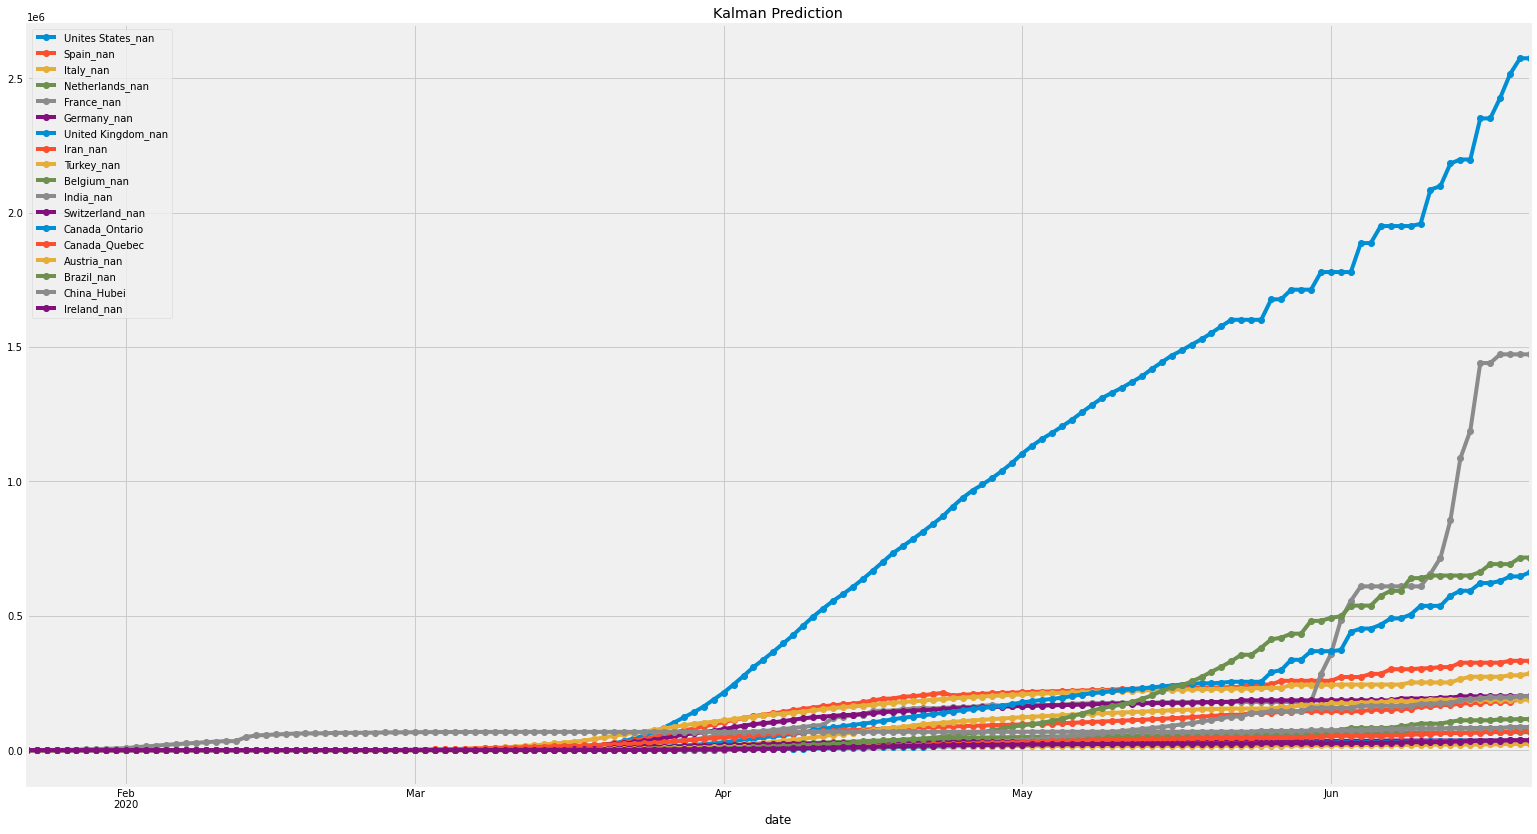

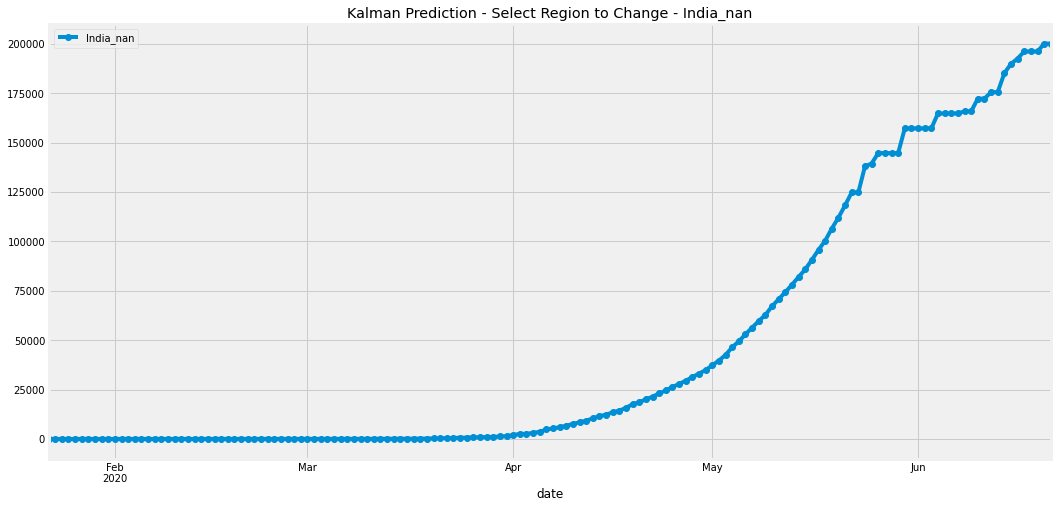

In [53]:
region=['date','Unites States_nan', 'Spain_nan',
       'Italy_nan', 'Netherlands_nan', 'France_nan',
       'Germany_nan', 'United Kingdom_nan', 'Iran_nan',
       'Turkey_nan', 'Belgium_nan', 'India_nan', 'Switzerland_nan','Canada_Ontario', 
       'Canada_Quebec', 'Austria_nan', 'Brazil_nan', 'China_Hubei',
       'Ireland_nan']
p_kalman=all_new[region]
#p=all_new
#p.iloc[len(p)-1,2]=None
p_kalman=p_kalman.set_index(['date'])
p_kalman.iloc[:,:].plot(marker='o',figsize=(24,14)).set_title('Kalman Prediction')

p_kalman2=all_new[['date','India_nan']]
p_kalman2=p_kalman2.set_index(['date'])
p_kalman2.iloc[:,:].plot(marker='o',figsize=(16,8)).set_title('Kalman Prediction - Select Region to Change - {}'.format(p_kalman2.columns[0]))

In [0]:
from google.colab import files
all_new.to_csv('Covid19_predictions.csv')
files.download("Covid19_predictions.csv")

------------------------------------
**TOTAL CONFIRMED CASES PREDICTION**
------------------------------------








**Models Used- 1) Support Vector Regression 2) Polynomial Regression 3) Bayesian Ridge 4) Facebook Prophet 5)LSTM Models 6)DNN Model using Sliding Windows**

SVR

In [0]:
# svm_confirmed = svm_search.best_estimator_
svm_confirmed = SVR(shrinking=True, kernel='poly',gamma=0.01, epsilon=1,degree=8, C=0.1)
svm_confirmed.fit(X_train_confirmed, np.ravel(y_train_confirmed))
svm_pred = svm_confirmed.predict(future_forcast)

In [0]:
# check against testing data
svm_test_pred = svm_confirmed.predict(X_test_confirmed)
plt.plot(y_test_confirmed)
plt.plot(svm_test_pred)
plt.legend(['Test Data', 'SVM Predictions'])
print('MAE:', mean_absolute_error(svm_test_pred, y_test_confirmed))
print('MSE:',mean_squared_error(svm_test_pred, y_test_confirmed))

In [0]:
# Future predictions using SVM 
print('SVM future predictions:')
set(zip(future_forcast_dates[-10:], np.round(svm_pred[-10:])))

In [0]:
plt.figure(figsize=(16, 9))
plt.plot(adjusted_dates, world_cases)
plt.plot(future_forcast, svm_pred, linestyle='dashed', color='purple')
plt.title('# of Coronavirus Cases Over Time', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('# of Cases', size=30)
plt.legend(['Confirmed Cases', 'SVM predictions'], prop={'size': 20})
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

Polynomial Regression

In [0]:
# transform our data for polynomial regression
poly = PolynomialFeatures(degree=6)
poly_X_train_confirmed = poly.fit_transform(X_train_confirmed)
poly_X_test_confirmed = poly.fit_transform(X_test_confirmed)
poly_future_forcast = poly.fit_transform(future_forcast)

In [56]:
# polynomial regression
linear_model = LinearRegression(normalize=True, fit_intercept=False)
linear_model.fit(poly_X_train_confirmed, y_train_confirmed)
test_linear_pred = linear_model.predict(poly_X_test_confirmed)
linear_pred = linear_model.predict(poly_future_forcast)
print('MAE:', mean_absolute_error(test_linear_pred, y_test_confirmed))
print('MSE:',mean_squared_error(test_linear_pred, y_test_confirmed))

MAE: 99212.0802750129
MSE: 21148733993.336052


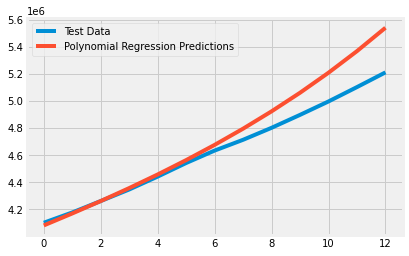

In [57]:
plt.plot(y_test_confirmed)
plt.plot(test_linear_pred)
plt.legend(['Test Data', 'Polynomial Regression Predictions'])

In [58]:
# Future predictions using Polynomial Regression 
linear_pred = linear_pred.reshape(1,-1)[0]
print('Polynomial regression future predictions:')
set(zip(future_forcast_dates[-10:], np.round(linear_pred[-10:])))

Polynomial regression future predictions:


{('05/23/2020', 5727020.0),
 ('05/24/2020', 5929765.0),
 ('05/25/2020', 6150011.0),
 ('05/26/2020', 6389446.0),
 ('05/27/2020', 6649863.0),
 ('05/28/2020', 6933158.0),
 ('05/29/2020', 7241340.0),
 ('05/30/2020', 7576528.0),
 ('05/31/2020', 7940963.0),
 ('06/01/2020', 8337003.0)}

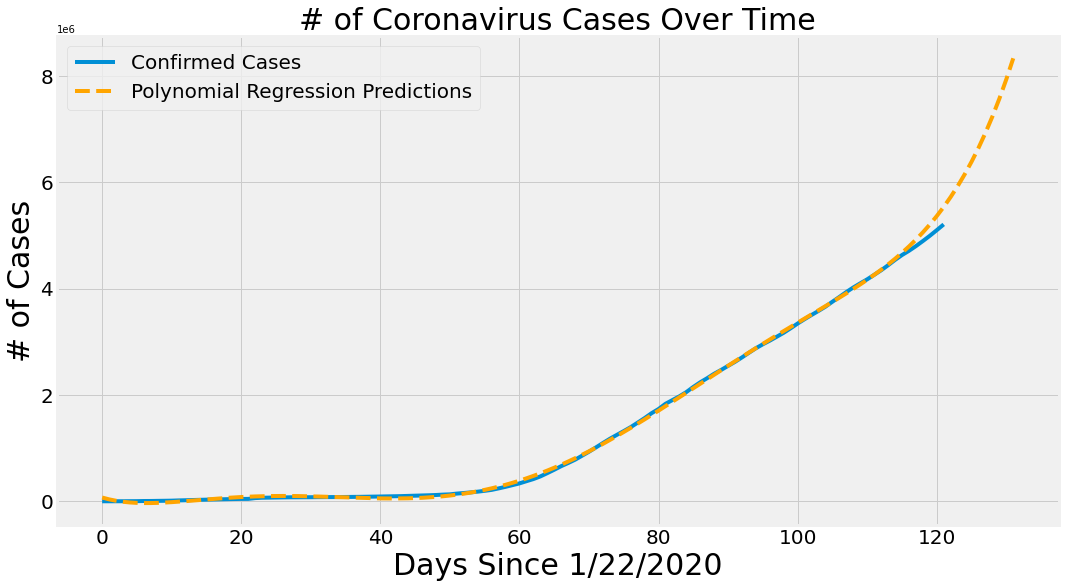

In [59]:
plt.figure(figsize=(16, 9))
plt.plot(adjusted_dates, world_cases)
plt.plot(future_forcast, linear_pred, linestyle='dashed', color='orange')
plt.title('# of Coronavirus Cases Over Time', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('# of Cases', size=30)
plt.legend(['Confirmed Cases', 'Polynomial Regression Predictions'], prop={'size': 20})
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

Bayesian Ridge Regression

In [60]:
# bayesian ridge polynomial regression
tol = [1e-4, 1e-3, 1e-2]
alpha_1 = [1e-7, 1e-6, 1e-5, 1e-4]
alpha_2 = [1e-7, 1e-6, 1e-5, 1e-4]
lambda_1 = [1e-7, 1e-6, 1e-5, 1e-4]
lambda_2 = [1e-7, 1e-6, 1e-5, 1e-4]

bayesian_grid = {'tol': tol, 'alpha_1': alpha_1, 'alpha_2' : alpha_2, 'lambda_1': lambda_1, 'lambda_2' : lambda_2}

bayesian = BayesianRidge(fit_intercept=False, normalize=True)
bayesian_search = RandomizedSearchCV(bayesian, bayesian_grid, scoring='neg_mean_squared_error', cv=3, return_train_score=True, n_jobs=-1, n_iter=40, verbose=1)
bayesian_search.fit(poly_X_train_confirmed, y_train_confirmed)

Fitting 3 folds for each of 40 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:    1.2s finished
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=BayesianRidge(alpha_1=1e-06, alpha_2=1e-06,
                                           alpha_init=None, compute_score=False,
                                           copy_X=True, fit_intercept=False,
                                           lambda_1=1e-06, lambda_2=1e-06,
                                           lambda_init=None, n_iter=300,
                                           normalize=True, tol=0.001,
                                           verbose=False),
                   iid='deprecated', n_iter=40, n_jobs=-1,
                   param_distributions={'alpha_1': [1e-07, 1e-06, 1e-05,
                                                    0.0001],
                                        'alpha_2': [1e-07, 1e-06, 1e-05,
                                                    0.0001],
                                        'lambda_1': [1e-07, 1e-06, 1e-05,
                                                 

In [61]:
bayesian_search.best_params_

{'alpha_1': 1e-07,
 'alpha_2': 1e-06,
 'lambda_1': 0.0001,
 'lambda_2': 1e-07,
 'tol': 0.01}

In [62]:
bayesian_confirmed = bayesian_search.best_estimator_
test_bayesian_pred = bayesian_confirmed.predict(poly_X_test_confirmed)
bayesian_pred = bayesian_confirmed.predict(poly_future_forcast)
print('MAE:', mean_absolute_error(test_bayesian_pred, y_test_confirmed))
print('MSE:',mean_squared_error(test_bayesian_pred, y_test_confirmed))

MAE: 897270.3394578131
MSE: 1110063371954.5662


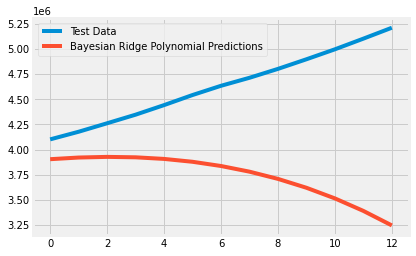

In [63]:
plt.plot(y_test_confirmed)
plt.plot(test_bayesian_pred)
plt.legend(['Test Data', 'Bayesian Ridge Polynomial Predictions'])

In [64]:
# Future predictions using Ridge Regression 
print('Ridge regression future predictions:')
set(zip(future_forcast_dates[-10:], np.round(bayesian_pred[-10:])))

Ridge regression future predictions:


{('05/23/2020', 3081648.0),
 ('05/24/2020', 2894228.0),
 ('05/25/2020', 2683238.0),
 ('05/26/2020', 2447331.0),
 ('05/27/2020', 2185112.0),
 ('05/28/2020', 1895136.0),
 ('05/29/2020', 1575908.0),
 ('05/30/2020', 1225881.0),
 ('05/31/2020', 843458.0),
 ('06/01/2020', 426986.0)}

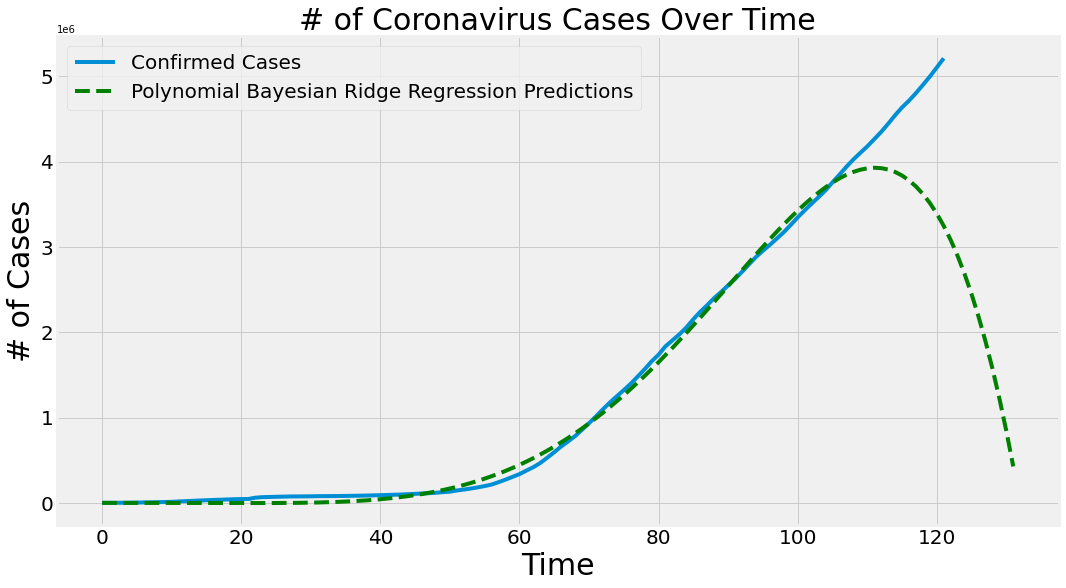

In [65]:
plt.figure(figsize=(16, 9))
plt.plot(adjusted_dates, world_cases)
plt.plot(future_forcast, bayesian_pred, linestyle='dashed', color='green')
plt.title('# of Coronavirus Cases Over Time', size=30)
plt.xlabel('Time', size=30)
plt.ylabel('# of Cases', size=30)
plt.legend(['Confirmed Cases', 'Polynomial Bayesian Ridge Regression Predictions'], prop={'size': 20})
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

**Facebook Prophet Package**

In [0]:
from fbprophet import Prophet
fp_df=pd.read_csv('ts_r.csv',usecols=[1])

In [0]:
total_cases=pd.DataFrame(world_cases)

In [0]:
fp_df=pd.concat([fp_df,total_cases],axis=1,sort=False)

In [69]:
fp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    122 non-null    object
 1   0       122 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.0+ KB


In [0]:
# Prophet requires columns ds (Date) and y (value)
fp_df = fp_df.rename(columns={'date': 'ds', 0: 'y'})

In [71]:
# Make the prophet model and fit on the data
fb_prophet = Prophet()
fb_prophet.fit(fp_df)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [0]:
fb_forecast = fb_prophet.predict(fp_df)

In [0]:
metric_df = fb_forecast.set_index('ds')[['yhat']].join(fp_df.set_index('ds').y).reset_index()

In [0]:
metric_df.dropna(inplace=True)

In [75]:
#Calculating MSE
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
mean_squared_error(metric_df.y, metric_df.yhat)


108058558.58364674

In [0]:
# Make a future dataframe for 10 days
fb_forecast = fb_prophet.make_future_dataframe(periods=10, freq='D')

In [0]:
# Make predictions
fb_forecast = fb_prophet.predict(fb_forecast)

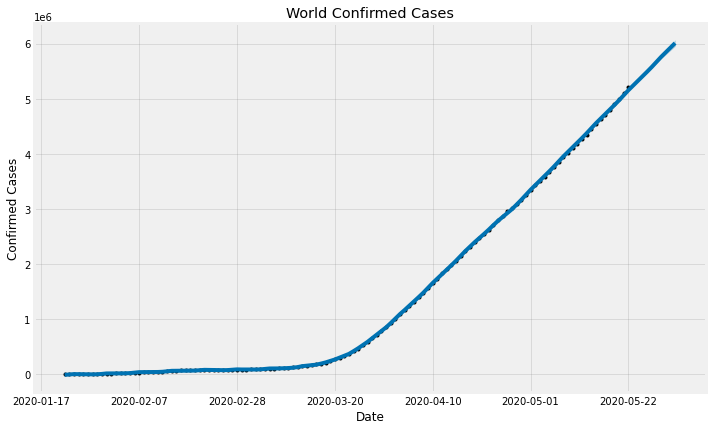

In [78]:
fb_prophet.plot(fb_forecast, xlabel = 'Date', ylabel = 'Confirmed Cases')
plt.title('World Confirmed Cases');

In [0]:
fb_forecast.rename(columns={'ds':'Date','yhat':'Confirmed_cases'},inplace=True)

In [0]:
fb_forecast=fb_forecast[['Date','Confirmed_cases']]

In [81]:
fb_forecast.tail(10)

,Date,Confirmed_cases
122,2020-05-23,5.239038e+06
123,2020-05-24,5.323590e+06
124,2020-05-25,5.406460e+06
125,2020-05-26,5.489919e+06
126,2020-05-27,5.576211e+06
127,2020-05-28,5.666856e+06
128,2020-05-29,5.758608e+06
129,2020-05-30,5.841419e+06
130,2020-05-31,5.925970e+06
131,2020-06-01,6.008840e+06


**LSTM Models**

In [0]:
confirmed_df=world_cases

**Vanilla LSTM**

In [0]:
# univariate data preparation
from numpy import array

# split a univariate sequence into samples
def split_sequence(sequence, n_steps):
	X, y = list(), list()
	for i in range(len(sequence)):
		# find the end of this pattern
		end_ix = i + n_steps
		# check if we are beyond the sequence
		if end_ix > len(sequence)-1:
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
		X.append(seq_x)
		y.append(seq_y)
	return array(X), array(y)

In [0]:
# split into train and test sets
train_size = int(len(confirmed_df) * 0.90)
test_size = len(confirmed_df) - train_size
train, test = confirmed_df[0:train_size,:], confirmed_df[train_size:len(confirmed_df),:]

In [0]:
# define input sequence
raw_seq = confirmed_df
# reshape dataset
n_steps = 3
trainX, trainY = split_sequence(train, n_steps)
testX, testY = split_sequence(test, n_steps)

In [86]:
# split into samples
X, y = split_sequence(raw_seq, n_steps)
# summarize the data
for i in range(len(trainX)):
	print(trainX[i], trainY[i])

[[555]
 [654]
 [941]] [1434]
[[ 654]
 [ 941]
 [1434]] [2118]
[[ 941]
 [1434]
 [2118]] [2927]
[[1434]
 [2118]
 [2927]] [5578]
[[2118]
 [2927]
 [5578]] [6166]
[[2927]
 [5578]
 [6166]] [8234]
[[5578]
 [6166]
 [8234]] [9927]
[[6166]
 [8234]
 [9927]] [12038]
[[ 8234]
 [ 9927]
 [12038]] [16787]
[[ 9927]
 [12038]
 [16787]] [19881]
[[12038]
 [16787]
 [19881]] [23892]
[[16787]
 [19881]
 [23892]] [27635]
[[19881]
 [23892]
 [27635]] [30794]
[[23892]
 [27635]
 [30794]] [34391]
[[27635]
 [30794]
 [34391]] [37120]
[[30794]
 [34391]
 [37120]] [40150]
[[34391]
 [37120]
 [40150]] [42762]
[[37120]
 [40150]
 [42762]] [44802]
[[40150]
 [42762]
 [44802]] [45221]
[[42762]
 [44802]
 [45221]] [60368]
[[44802]
 [45221]
 [60368]] [66885]
[[45221]
 [60368]
 [66885]] [69030]
[[60368]
 [66885]
 [69030]] [71224]
[[66885]
 [69030]
 [71224]] [73258]
[[69030]
 [71224]
 [73258]] [75136]
[[71224]
 [73258]
 [75136]] [75639]
[[73258]
 [75136]
 [75639]] [76197]
[[75136]
 [75639]
 [76197]] [76819]
[[75639]
 [76197]
 [76819]

In [0]:
# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = 1
trainX = trainX.reshape((trainX.shape[0], trainX.shape[1], n_features))

In [88]:
# define model
from keras.models import Sequential
from keras.layers import Dense,LSTM
from keras.layers.wrappers import TimeDistributed
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(n_steps, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [89]:
# fit model
model.fit(trainX, trainY, epochs=200, verbose=0)

In [90]:
# Estimate model performance
trainScore = model.evaluate(trainX, trainY, verbose=0)
print('Train Score: %.2f MSE (%.2f RMSE)' % (trainScore, math.sqrt(trainScore)))
testScore = model.evaluate(testX, testY, verbose=0)
print('Test Score: %.2f MSE (%.2f RMSE)' % (testScore, math.sqrt(testScore)))

Train Score: 1841008802.72 MSE (42906.98 RMSE)
Test Score: 9751868416.00 MSE (98751.55 RMSE)


In [91]:
testY

array([[4347018],
       [4442163],
       [4542347],
       [4634068],
       [4713620],
       [4801943],
       [4897492],
       [4996472],
       [5102424],
       [5210817]])

In [92]:
# demonstrate prediction
x_input = array([4996472,5102424,5210817])
x_input = x_input.reshape((1, n_steps, n_features))
yhat = model.predict(x_input, verbose=0)
yhat

array([[5420038.]], dtype=float32)

**Stacked LSTM**

In [0]:
# define model
model = Sequential()
model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(n_steps, n_features)))
model.add(LSTM(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [94]:
# fit model
model.fit(trainX, trainY, epochs=300, verbose=0)

In [95]:
# Estimate model performance
trainScore = model.evaluate(trainX, trainY, verbose=0)
print('Train Score: %.2f MSE (%.2f RMSE)' % (trainScore, math.sqrt(trainScore)))
testScore = model.evaluate(testX, testY, verbose=0)
print('Test Score: %.2f MSE (%.2f RMSE)' % (testScore, math.sqrt(testScore)))

Train Score: 2598491065.96 MSE (50975.40 RMSE)
Test Score: 16126959616.00 MSE (126991.97 RMSE)


In [96]:
# demonstrate prediction
x_input = array([4996472,5102424,5210817])
x_input = x_input.reshape((1, n_steps, n_features))
yhat = model.predict(x_input, verbose=0)
yhat

array([[5449105.]], dtype=float32)

**Bidirectional LSTM**

In [0]:
from numpy import array
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Bidirectional
# define model
model = Sequential()
model.add(Bidirectional(LSTM(50, activation='relu'), input_shape=(n_steps, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [98]:
# fit model
model.fit(trainX, trainY, epochs=200, verbose=0)
# Estimate model performance
trainScore = model.evaluate(trainX, trainY, verbose=0)
print('Train Score: %.2f MSE (%.2f RMSE)' % (trainScore, math.sqrt(trainScore)))
testScore = model.evaluate(testX, testY, verbose=0)
print('Test Score: %.2f MSE (%.2f RMSE)' % (testScore, math.sqrt(testScore)))

Train Score: 2150087015.85 MSE (46369.03 RMSE)
Test Score: 9787957248.00 MSE (98934.11 RMSE)


In [99]:
# demonstrate prediction
x_input = array([4996472,5102424,5210817])
x_input = x_input.reshape((1, n_steps, n_features))
yhat = model.predict(x_input, verbose=0)
yhat

array([[5419229.]], dtype=float32)

**CNN LSTM**

In [0]:
# univariate cnn lstm example
from numpy import array
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import TimeDistributed
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D

In [0]:
# define input sequence
raw_seq = confirmed_df
# reshape dataset
n_steps = 4
trainX, trainY = split_sequence(train, n_steps)
testX, testY = split_sequence(test, n_steps)

In [102]:
# split into samples
X, y = split_sequence(raw_seq, n_steps)
# summarize the data
for i in range(len(trainX)):
	print(trainX[i], trainY[i])

[[ 555]
 [ 654]
 [ 941]
 [1434]] [2118]
[[ 654]
 [ 941]
 [1434]
 [2118]] [2927]
[[ 941]
 [1434]
 [2118]
 [2927]] [5578]
[[1434]
 [2118]
 [2927]
 [5578]] [6166]
[[2118]
 [2927]
 [5578]
 [6166]] [8234]
[[2927]
 [5578]
 [6166]
 [8234]] [9927]
[[5578]
 [6166]
 [8234]
 [9927]] [12038]
[[ 6166]
 [ 8234]
 [ 9927]
 [12038]] [16787]
[[ 8234]
 [ 9927]
 [12038]
 [16787]] [19881]
[[ 9927]
 [12038]
 [16787]
 [19881]] [23892]
[[12038]
 [16787]
 [19881]
 [23892]] [27635]
[[16787]
 [19881]
 [23892]
 [27635]] [30794]
[[19881]
 [23892]
 [27635]
 [30794]] [34391]
[[23892]
 [27635]
 [30794]
 [34391]] [37120]
[[27635]
 [30794]
 [34391]
 [37120]] [40150]
[[30794]
 [34391]
 [37120]
 [40150]] [42762]
[[34391]
 [37120]
 [40150]
 [42762]] [44802]
[[37120]
 [40150]
 [42762]
 [44802]] [45221]
[[40150]
 [42762]
 [44802]
 [45221]] [60368]
[[42762]
 [44802]
 [45221]
 [60368]] [66885]
[[44802]
 [45221]
 [60368]
 [66885]] [69030]
[[45221]
 [60368]
 [66885]
 [69030]] [71224]
[[60368]
 [66885]
 [69030]
 [71224]] [73258]

In [0]:
# reshape from [samples, timesteps] into [samples, subsequences, timesteps, features]
n_features = 1
n_seq = 2
n_steps = 2
trainX = trainX.reshape((trainX.shape[0], n_seq, n_steps, n_features))

In [0]:
# reshape from [samples, timesteps] into [samples, subsequences, timesteps, features]
n_features = 1
n_seq = 2
n_steps = 2
testX = testX.reshape((testX.shape[0], n_seq, n_steps, n_features))

In [105]:
# define model
model = Sequential()
model.add(TimeDistributed(Conv1D(filters=64, kernel_size=1, activation='relu'), input_shape=(None, n_steps, n_features)))
model.add(TimeDistributed(MaxPooling1D(pool_size=2)))
model.add(TimeDistributed(Flatten()))
model.add(LSTM(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
# fit model
model.fit(trainX, trainY, epochs=500, verbose=0)

In [106]:
# Estimate model performance
trainScore = model.evaluate(trainX, trainY, verbose=0)
print('Train Score: %.2f MSE (%.2f RMSE)' % (trainScore, math.sqrt(trainScore)))
testScore = model.evaluate(testX, testY, verbose=0)
print('Test Score: %.2f MSE (%.2f RMSE)' % (testScore, math.sqrt(testScore)))

Train Score: 1918882266.21 MSE (43805.05 RMSE)
Test Score: 10927301632.00 MSE (104533.73 RMSE)


In [107]:
testY

array([[4442163],
       [4542347],
       [4634068],
       [4713620],
       [4801943],
       [4897492],
       [4996472],
       [5102424],
       [5210817]])

In [108]:
# demonstrate prediction
x_input = array([4897492,4996472,5102424,5210817])
x_input = x_input.reshape((1, n_seq, n_steps, n_features))
yhat = model.predict(x_input, verbose=0)
print(yhat)

[[5425503.]]


**Deep Learning Model using sliding windows method**

Epoch 1/400
 - 0s - loss: 2175316736879.8477
Epoch 2/400
 - 0s - loss: 1495182160798.4761
Epoch 3/400
 - 0s - loss: 872182479803.4285
Epoch 4/400
 - 0s - loss: 332913468522.0952
Epoch 5/400
 - 0s - loss: 62719549980.2095
Epoch 6/400
 - 0s - loss: 6362534622.8571
Epoch 7/400
 - 0s - loss: 1542959700.5655
Epoch 8/400
 - 0s - loss: 1754989868.3631
Epoch 9/400
 - 0s - loss: 1556618197.7857
Epoch 10/400
 - 0s - loss: 1623579250.5143
Epoch 11/400
 - 0s - loss: 1602894661.6004
Epoch 12/400
 - 0s - loss: 1571949387.0268
Epoch 13/400
 - 0s - loss: 1533860399.9810
Epoch 14/400
 - 0s - loss: 1430090189.7095
Epoch 15/400
 - 0s - loss: 1296211769.9756
Epoch 16/400
 - 0s - loss: 1179694798.4774
Epoch 17/400
 - 0s - loss: 1148486599.9845
Epoch 18/400
 - 0s - loss: 1153278559.7685
Epoch 19/400
 - 0s - loss: 997939139.2167
Epoch 20/400
 - 0s - loss: 938921272.9554
Epoch 21/400
 - 0s - loss: 836619574.5714
Epoch 22/400
 - 0s - loss: 805036144.8679
Epoch 23/400
 - 0s - loss: 797193102.8458
Epoch 24/400
 

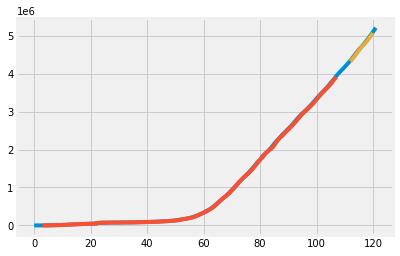

In [109]:
# Multilayer Perceptron to Predict Next days Confirmed Cases (t+1, given t, t-1, t-2)
import numpy
import matplotlib.pyplot as plt
from pandas import read_csv
import math
from keras.models import Sequential
from keras.layers import Dense

# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return numpy.array(dataX), numpy.array(dataY)

# load the dataset
dataset = world_cases
dataset = dataset.astype('float32')

# split into train and test sets
train_size = int(len(dataset) * 0.90)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

# reshape dataset
look_back = 3
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

# create and fit Multilayer Perceptron model
model = Sequential()
model.add(Dense(12, input_dim=look_back, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=400, batch_size=2, verbose=2)

# Estimate model performance
trainScore = model.evaluate(trainX, trainY, verbose=0)
print('Train Score: %.2f MSE (%.2f RMSE)' % (trainScore, math.sqrt(trainScore)))
testScore = model.evaluate(testX, testY, verbose=0)
print('Test Score: %.2f MSE (%.2f RMSE)' % (testScore, math.sqrt(testScore)))

# generate predictions for training
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(dataset)
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [110]:
testPredict

array([[4324099.5],
       [4411776. ],
       [4510363. ],
       [4614408.5],
       [4705328.5],
       [4780390. ],
       [4869267.5],
       [4969035. ],
       [5070920. ]], dtype=float32)

In [111]:
testY

array([4347018., 4442163., 4542347., 4634068., 4713620., 4801943.,
       4897492., 4996472., 5102424.], dtype=float32)

**Comparing Errors of all the models**

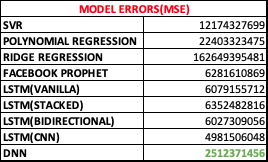

*We can see that the error of DNN is the lowest. Therefore we will use **DNN Model** for further predicitions.*

**We will provide the predictions from the Kalman Model to predict Tomorrow's Confirmed cases using DNN Model**

In [0]:
total_confirmed=all_new.sum(axis=1)

In [0]:
confirmed_dnn=total_confirmed[0:123]

In [0]:
confirmed_dnn=confirmed_dnn.values

In [0]:
confirmed_dnn=confirmed_dnn.reshape(123,1)

Epoch 1/400
 - 0s - loss: 2270873557771.6040
Epoch 2/400
 - 0s - loss: 1685391100181.7358
Epoch 3/400
 - 0s - loss: 1147588524263.8491
Epoch 4/400
 - 0s - loss: 614478515941.4340
Epoch 5/400
 - 0s - loss: 216721868985.4340
Epoch 6/400
 - 0s - loss: 10499376282.5991
Epoch 7/400
 - 0s - loss: 1322540069.7571
Epoch 8/400
 - 0s - loss: 1318137303.5389
Epoch 9/400
 - 0s - loss: 1311950111.2830
Epoch 10/400
 - 0s - loss: 1303649734.4670
Epoch 11/400
 - 0s - loss: 1310252966.0743
Epoch 12/400
 - 0s - loss: 1356909534.5684
Epoch 13/400
 - 0s - loss: 1294406502.3514
Epoch 14/400
 - 0s - loss: 1303799297.2305
Epoch 15/400
 - 0s - loss: 1367179443.1002
Epoch 16/400
 - 0s - loss: 1340959435.0485
Epoch 17/400
 - 0s - loss: 1301149110.7123
Epoch 18/400
 - 0s - loss: 1299492635.5307
Epoch 19/400
 - 0s - loss: 1278562072.3361
Epoch 20/400
 - 0s - loss: 1264301747.6498
Epoch 21/400
 - 0s - loss: 1245612721.2807
Epoch 22/400
 - 0s - loss: 1309585420.4151
Epoch 23/400
 - 0s - loss: 1268760963.4363
Epoch 

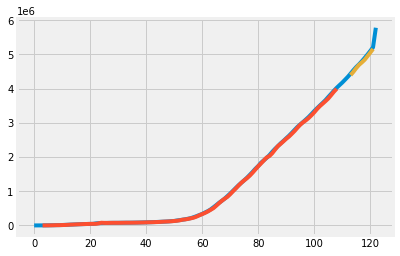

In [116]:
# Multilayer Perceptron to Predict Next days Confirmed Cases (t+1, given t, t-1, t-2)
import numpy
import matplotlib.pyplot as plt
from pandas import read_csv
import math
from keras.models import Sequential
from keras.layers import Dense

# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return numpy.array(dataX), numpy.array(dataY)

# load the dataset
dataset = confirmed_dnn
dataset = dataset.astype('float32')

# split into train and test sets
train_size = int(len(dataset) * 0.90)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

# reshape dataset
look_back = 3
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

# create and fit Multilayer Perceptron model
model = Sequential()
model.add(Dense(12, input_dim=look_back, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=400, batch_size=2, verbose=2)

# Estimate model performance
trainScore = model.evaluate(trainX, trainY, verbose=0)
print('Train Score: %.2f MSE (%.2f RMSE)' % (trainScore, math.sqrt(trainScore)))
testScore = model.evaluate(testX, testY, verbose=0)
print('Test Score: %.2f MSE (%.2f RMSE)' % (testScore, math.sqrt(testScore)))

# generate predictions for training
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(dataset)
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [117]:
#Next Days Prediction
testPredict[-1]

array([5162027.5], dtype=float32)

**Prediction for India**

In [0]:
India_pred=all_new['India_nan']

In [0]:
India_pred=India_pred[0:123]

In [0]:
India_pred=India_pred.values

In [0]:
India_pred=India_pred.reshape(123,1)

Epoch 1/400
 - 0s - loss: 425019795.4235
Epoch 2/400
 - 0s - loss: 355631289.5805
Epoch 3/400
 - 0s - loss: 301914677.4750
Epoch 4/400
 - 0s - loss: 255247852.8388
Epoch 5/400
 - 0s - loss: 203982528.6590
Epoch 6/400
 - 0s - loss: 147990109.3569
Epoch 7/400
 - 0s - loss: 56018565.8606
Epoch 8/400
 - 0s - loss: 9999962.8911
Epoch 9/400
 - 0s - loss: 1177900.3496
Epoch 10/400
 - 0s - loss: 232210.6582
Epoch 11/400
 - 0s - loss: 213189.1223
Epoch 12/400
 - 0s - loss: 214308.1392
Epoch 13/400
 - 0s - loss: 212678.7984
Epoch 14/400
 - 0s - loss: 216441.4967
Epoch 15/400
 - 0s - loss: 213172.2008
Epoch 16/400
 - 0s - loss: 210847.1174
Epoch 17/400
 - 0s - loss: 209800.9581
Epoch 18/400
 - 0s - loss: 213465.6010
Epoch 19/400
 - 0s - loss: 214821.3739
Epoch 20/400
 - 0s - loss: 208243.2866
Epoch 21/400
 - 0s - loss: 192390.7707
Epoch 22/400
 - 0s - loss: 198667.2338
Epoch 23/400
 - 0s - loss: 202087.4601
Epoch 24/400
 - 0s - loss: 206851.7111
Epoch 25/400
 - 0s - loss: 202221.8359
Epoch 26/400

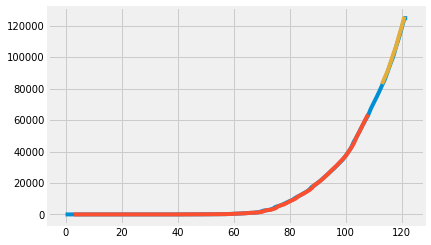

In [122]:
# Multilayer Perceptron to Predict Next days Confirmed Cases (t+1, given t, t-1, t-2)
import numpy
import matplotlib.pyplot as plt
from pandas import read_csv
import math
from keras.models import Sequential
from keras.layers import Dense

# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return numpy.array(dataX), numpy.array(dataY)

# load the dataset
dataset = India_pred
dataset = dataset.astype('float32')

# split into train and test sets
train_size = int(len(dataset) * 0.90)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

# reshape dataset
look_back = 3
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

# create and fit Multilayer Perceptron model
model = Sequential()
model.add(Dense(12, input_dim=look_back, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=400, batch_size=2, verbose=2)

# Estimate model performance
trainScore = model.evaluate(trainX, trainY, verbose=0)
print('Train Score: %.2f MSE (%.2f RMSE)' % (trainScore, math.sqrt(trainScore)))
testScore = model.evaluate(testX, testY, verbose=0)
print('Test Score: %.2f MSE (%.2f RMSE)' % (testScore, math.sqrt(testScore)))

# generate predictions for training
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(dataset)
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [123]:
#Next Days Prediction
testPredict[-1]

array([125694.18], dtype=float32)